## Transports of water and tracer along several cross-sections of the base case

Transports across several cross sections in the domain (See plot further down)

Water transport calculated as $\Phi_w = \vec{u}\cdot\vec{a}$

Advective tracer transport $\Phi_{Tadv}=C\vec{u}\cdot\vec{a}$ from model output diagnostics.

Diffusive tracer transport $\Phi_{Tdiff}$ from model output (Includes diffusion due to advection scheme)

Frequency of output is 43200 s (half a day) and the size of the fields is 360x360x90x20.


For passive tracers units correspond to what I entered as units in data.ptracers but it really doesn't matter.

Filename: FluxTR01 

| Variable    |   Units                        | Description  | Coordinates           | Size                      |
|------------ | :----------------------------: |:-------------|:---------------------:|:--------------------------:
| UTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$    |Zonal Mass-Weighted Transp of Tr01   | (T, Z, Y, Xp1) | (18,90,360,361)
| VTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$    |Meridional Mass-Weighted Transp of Tr01|(T, Z, Yp1, X) | (18,90,361,360)
| WTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$    |Vertical Mass-Weighted Transp of Tr01|(T, Z, Y, X) | (18,90,360,360)
| ADVrTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Vertical Advective Flux of Tr01|(T, Z, Y, X) | (18,90,360,360)
| ADVxTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Zonal Advective Flux of Tr01 |(T, Z, Y, Xp1) | (18,90,360,361)
| ADVyTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Meridional Advective Flux of Tr01|(T, Z, Yp1, X) | (18,90,361,360)
| DFrETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Vertical Diffusive Flux of Tr01 (Explicit part)|(T, Z, Y, X)| (18,90,360,360)
| DFxETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  | Zonal      Diffusive Flux of Tr01|(T, Z, Y, Xp1) | (18,90,360,361)
| DFyETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  | Meridional Diffusive Flux of Tr01|(T, Z, Yp1, X) | (18,90,361,360)
| DFrITr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  | Vertical Diffusive Flux of Tr01 (Implicit part)| (T, Z, Y, X) | (18,90,360,360) 
 

In [4]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import scipy.io
import xarray as xr

In [34]:
def calc_wat_transport_CS(vel_component, x_slice, y_slice, spacing, dim_name):
    '''
    INPUT:
    vel_component: xarray, Velocity component perpendicular to cross section (e.g. state03.V)
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    spacing: xarray, width of cross section elements (e.g. dxG, etc)
    dim_name: str, name of the dimension along which to sum.
    
    '''
    vel_CS = (vel_component.isel(Yp1=y_slice, X=x_slice))
    dx_CS = (spacing.isel(Yp1=y_slice, X=x_slice))

    waterCS_flux = (dx_CS*vel_CS).sum(dim=dim_name)

    return waterCS_flux

def calc_wat_transport_AS(vel_component, x_slice, y_slice, spacing, dim_name):
    '''
    INPUT:
    vel_component: xarray, Velocity component perpendicular to cross section (e.g. state03.V)
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    spacing: xarray, width of cross section elements (e.g. dxG, etc)
    dim_name: str, name of the dimension along which to sum.
    
    '''
    vel_AS = (vel_component.isel(Y=y_slice, Xp1=x_slice))
    dx_AS = (spacing.isel(Y=y_slice, Xp1=x_slice))

    waterAS_flux = (dx_AS*vel_AS).sum(dim=dim_name)

    return waterAS_flux

In [ ]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
state_file03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
ptracers_file03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'


grid = xr.open_dataset(grid_file)
state03 = xr.open_dataset(state_file03)
tracers03 = xr.open_dataset(ptracers_file03)

### Cross-sections

In [88]:
CS1_x_slice = slice(0, 59)
CS2_x_slice = slice(60, 119)
CS3_x_slice = slice(120, 239)
CS4_x_slice = slice(240, 299)
CS5_x_slice = slice(300, 359)

CS1_y_ind = 227
CS1b_y_ind = 267
CS1c_y_ind = 297
CS1d_y_ind = 359

AS1_y_slice = slice(227, 266)
AS2_y_slice = slice(267, 298)
AS3_y_slice = slice(269, 359)

AS1_x_ind = 59
AS1b_x_ind = 119
AS1c_x_ind = 239
AS1d_x_ind = 299

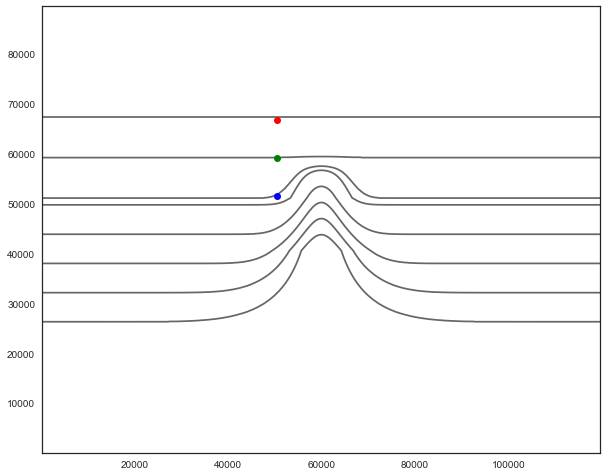

In [77]:
sns.set_style(style='white')
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.contour(grid.X,grid.Y,grid.Depth,[50,100,150,200,400,600,800,1000], colors='0.4')
ax.plot(grid.X[120],grid.Y[227], 'bo')
ax.plot(grid.X[120],grid.Y[267], 'go')
ax.plot(grid.X[120],grid.Y[297], 'ro')

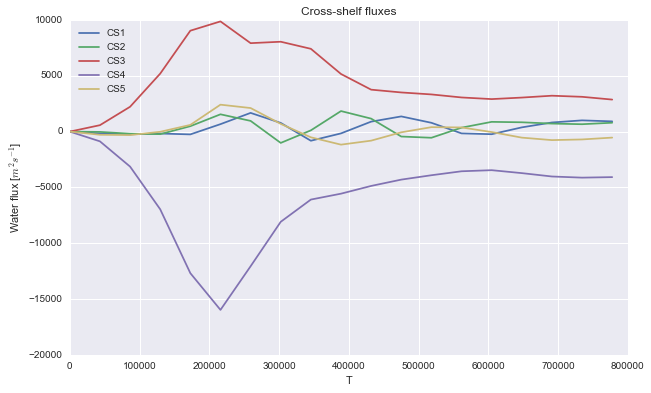

In [52]:
waterCS1_flux = calc_wat_transport_CS(state03.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux = calc_wat_transport_CS(state03.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux = calc_wat_transport_CS(state03.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux = calc_wat_transport_CS(state03.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux = calc_wat_transport_CS(state03.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux.name = 'WaterFlux_CS1'
waterCS1_flux.attrs['units'] = 'm2/s'
waterCS2_flux.name = 'WaterFlux_CS2'
waterCS2_flux.attrs['units'] = 'm2/s'
waterCS3_flux.name = 'WaterFlux_CS3'
waterCS3_flux.attrs['units'] = 'm2/s'
waterCS4_flux.name = 'WaterFlux_CS4'
waterCS4_flux.attrs['units'] = 'm2/s'
waterCS5_flux.name = 'WaterFlux_CS5'
waterCS5_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS1_flux.sum(dim='Z').plot(ax=ax, label = 'CS1')
waterCS2_flux.sum(dim='Z').plot(ax=ax, label = 'CS2')
waterCS3_flux.sum(dim='Z').plot(ax=ax, label = 'CS3')
waterCS4_flux.sum(dim='Z').plot(ax=ax, label = 'CS4')
waterCS5_flux.sum(dim='Z').plot(ax=ax, label = 'CS5') 

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')

From 100m down


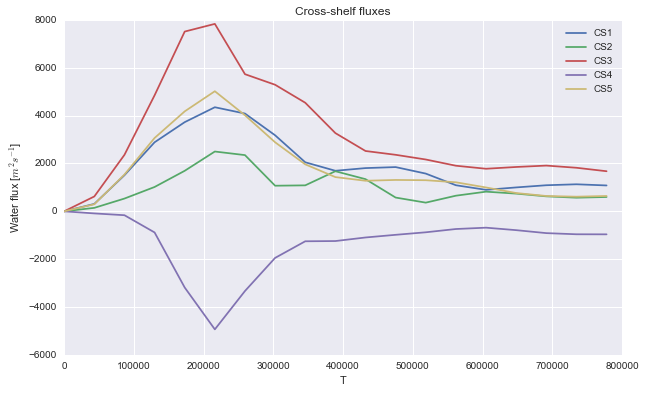

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS1_flux.isel(Z=slice(20,90)).sum(dim='Z').plot(ax=ax, label = 'CS1')
waterCS2_flux.isel(Z=slice(20,90)).sum(dim='Z').plot(ax=ax, label = 'CS2')
waterCS3_flux.isel(Z=slice(20,90)).sum(dim='Z').plot(ax=ax, label = 'CS3')
waterCS4_flux.isel(Z=slice(20,90)).sum(dim='Z').plot(ax=ax, label = 'CS4')
waterCS5_flux.isel(Z=slice(20,90)).sum(dim='Z').plot(ax=ax, label = 'CS5') 

print('From 100m down')
ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')


top 100 m


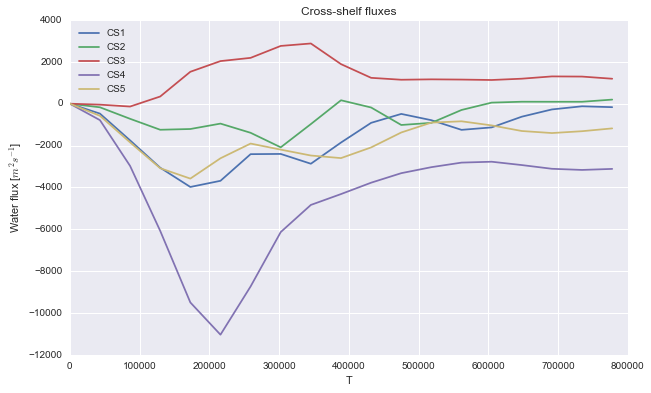

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS1_flux.isel(Z=slice(0,20)).sum(dim='Z').plot(ax=ax, label = 'CS1')
waterCS2_flux.isel(Z=slice(0,20)).sum(dim='Z').plot(ax=ax, label = 'CS2')
waterCS3_flux.isel(Z=slice(0,20)).sum(dim='Z').plot(ax=ax, label = 'CS3')
waterCS4_flux.isel(Z=slice(0,20)).sum(dim='Z').plot(ax=ax, label = 'CS4')
waterCS5_flux.isel(Z=slice(0,20)).sum(dim='Z').plot(ax=ax, label = 'CS5') 

print('top 100 m')
ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')


Below the shelf break


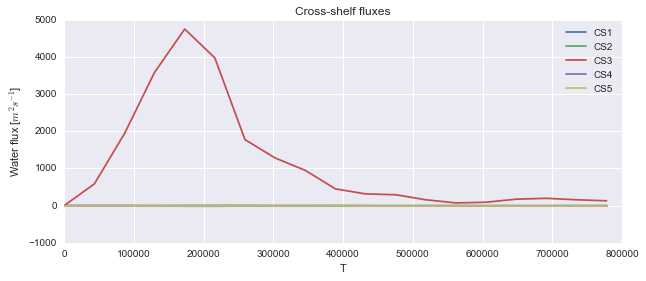

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

waterCS1_flux.isel(Z=slice(30,90)).sum(dim='Z').plot(ax=ax, label = 'CS1')
waterCS2_flux.isel(Z=slice(30,90)).sum(dim='Z').plot(ax=ax, label = 'CS2')
waterCS3_flux.isel(Z=slice(30,90)).sum(dim='Z').plot(ax=ax, label = 'CS3')
waterCS4_flux.isel(Z=slice(30,90)).sum(dim='Z').plot(ax=ax, label = 'CS4')
waterCS5_flux.isel(Z=slice(30,90)).sum(dim='Z').plot(ax=ax, label = 'CS5') 

print('Below the shelf break')
ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')


### How much water goes beyond 100 m?

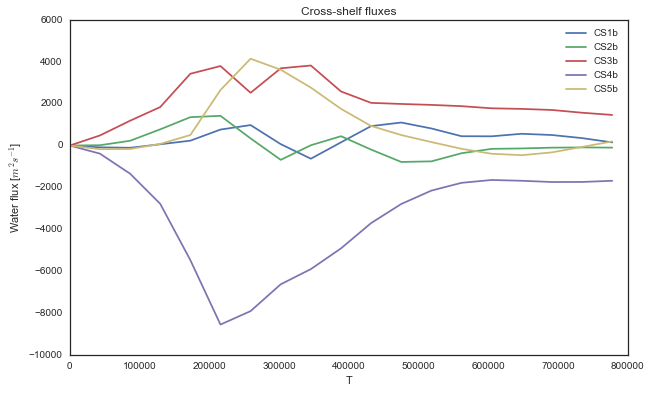

In [73]:
waterCS1b_flux = calc_wat_transport_CS(state03.V, CS1_x_slice, CS1b_y_ind, grid.dxG , 'X')
waterCS2b_flux = calc_wat_transport_CS(state03.V, CS2_x_slice, CS1b_y_ind, grid.dxG , 'X')
waterCS3b_flux = calc_wat_transport_CS(state03.V, CS3_x_slice, CS1b_y_ind, grid.dxG , 'X')
waterCS4b_flux = calc_wat_transport_CS(state03.V, CS4_x_slice, CS1b_y_ind, grid.dxG , 'X')
waterCS5b_flux = calc_wat_transport_CS(state03.V, CS5_x_slice, CS1b_y_ind, grid.dxG , 'X')

waterCS1b_flux.name = 'WaterFlux_CS1b'
waterCS1b_flux.attrs['units'] = 'm2/s'
waterCS2b_flux.name = 'WaterFlux_CS2b'
waterCS2b_flux.attrs['units'] = 'm2/s'
waterCS3b_flux.name = 'WaterFlux_CS3b'
waterCS3b_flux.attrs['units'] = 'm2/s'
waterCS4b_flux.name = 'WaterFlux_CS4b'
waterCS4b_flux.attrs['units'] = 'm2/s'
waterCS5b_flux.name = 'WaterFlux_CS5b'
waterCS5b_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS1b_flux.sum(dim='Z').plot(ax=ax, label = 'CS1b')
waterCS2b_flux.sum(dim='Z').plot(ax=ax, label = 'CS2b')
waterCS3b_flux.sum(dim='Z').plot(ax=ax, label = 'CS3b')
waterCS4b_flux.sum(dim='Z').plot(ax=ax, label = 'CS4b')
waterCS5b_flux.sum(dim='Z').plot(ax=ax, label = 'CS5b') 

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')

### How much water goes beyond 50 m?

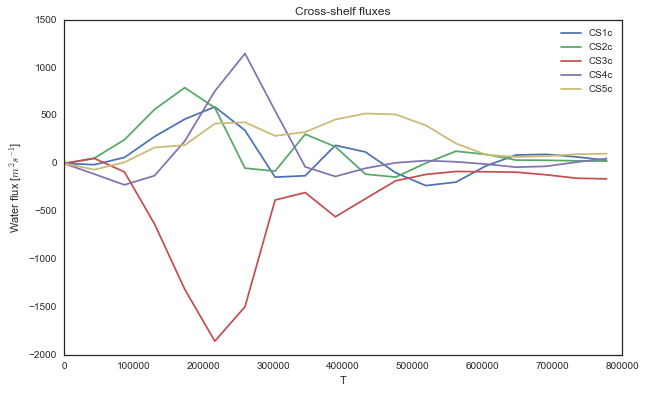

In [81]:
waterCS1c_flux = calc_wat_transport_CS(state03.V, CS1_x_slice, CS1c_y_ind, grid.dxG , 'X')
waterCS2c_flux = calc_wat_transport_CS(state03.V, CS2_x_slice, CS1c_y_ind, grid.dxG , 'X')
waterCS3c_flux = calc_wat_transport_CS(state03.V, CS3_x_slice, CS1c_y_ind, grid.dxG , 'X')
waterCS4c_flux = calc_wat_transport_CS(state03.V, CS4_x_slice, CS1c_y_ind, grid.dxG , 'X')
waterCS5c_flux = calc_wat_transport_CS(state03.V, CS5_x_slice, CS1c_y_ind, grid.dxG , 'X')

waterCS1c_flux.name = 'WaterFlux_CS1c'
waterCS1c_flux.attrs['units'] = 'm2/s'
waterCS2c_flux.name = 'WaterFlux_CS2c'
waterCS2c_flux.attrs['units'] = 'm2/s'
waterCS3c_flux.name = 'WaterFlux_CS3c'
waterCS3c_flux.attrs['units'] = 'm2/s'
waterCS4c_flux.name = 'WaterFlux_CS4c'
waterCS4c_flux.attrs['units'] = 'm2/s'
waterCS5c_flux.name = 'WaterFlux_CS5c'
waterCS5c_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS1c_flux.sum(dim='Z').plot(ax=ax, label = 'CS1c')
waterCS2c_flux.sum(dim='Z').plot(ax=ax, label = 'CS2c')
waterCS3c_flux.sum(dim='Z').plot(ax=ax, label = 'CS3c')
waterCS4c_flux.sum(dim='Z').plot(ax=ax, label = 'CS4c')
waterCS5c_flux.sum(dim='Z').plot(ax=ax, label = 'CS5c') 

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')

### How much water enters the domain thorugh the N boundary?

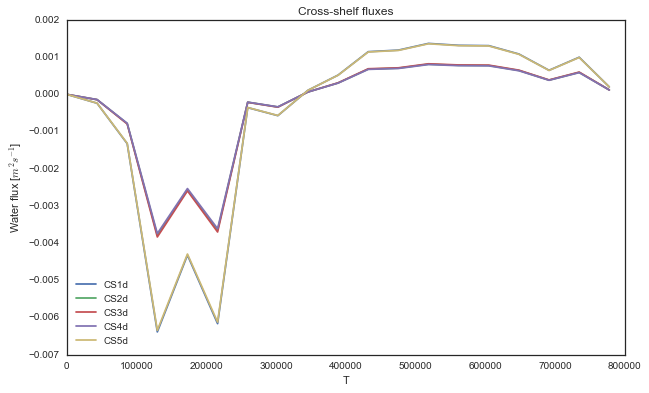

In [86]:
waterCS1d_flux = calc_wat_transport_CS(state03.V, CS1_x_slice, CS1d_y_ind, grid.dxG , 'X')
waterCS2d_flux = calc_wat_transport_CS(state03.V, CS2_x_slice, CS1d_y_ind, grid.dxG , 'X')
waterCS3d_flux = calc_wat_transport_CS(state03.V, CS3_x_slice, CS1d_y_ind, grid.dxG , 'X')
waterCS4d_flux = calc_wat_transport_CS(state03.V, CS4_x_slice, CS1d_y_ind, grid.dxG , 'X')
waterCS5d_flux = calc_wat_transport_CS(state03.V, CS5_x_slice, CS1d_y_ind, grid.dxG , 'X')

waterCS1d_flux.name = 'WaterFlux_CS1d'
waterCS1d_flux.attrs['units'] = 'm2/s'
waterCS2d_flux.name = 'WaterFlux_CS2d'
waterCS2d_flux.attrs['units'] = 'm2/s'
waterCS3d_flux.name = 'WaterFlux_CS3d'
waterCS3d_flux.attrs['units'] = 'm2/s'
waterCS4d_flux.name = 'WaterFlux_CS4d'
waterCS4d_flux.attrs['units'] = 'm2/s'
waterCS5d_flux.name = 'WaterFlux_CS5d'
waterCS5d_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS1d_flux.sum(dim='Z').plot(ax=ax, label = 'CS1d')
waterCS2d_flux.sum(dim='Z').plot(ax=ax, label = 'CS2d')
waterCS3d_flux.sum(dim='Z').plot(ax=ax, label = 'CS3d')
waterCS4d_flux.sum(dim='Z').plot(ax=ax, label = 'CS4d')
waterCS5d_flux.sum(dim='Z').plot(ax=ax, label = 'CS5d') 

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')

## Alongshore transports

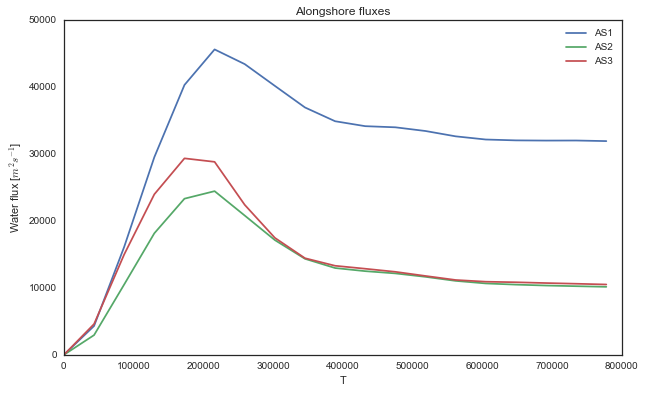

In [90]:
waterAS1_flux = calc_wat_transport_AS(state03.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux = calc_wat_transport_AS(state03.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux = calc_wat_transport_AS(state03.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux.name = 'WaterFlux_AS1'
waterAS1_flux.attrs['units'] = 'm2/s'
waterAS2_flux.name = 'WaterFlux_AS2'
waterAS2_flux.attrs['units'] = 'm2/s'
waterAS3_flux.name = 'WaterFlux_AS3'
waterAS3_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterAS1_flux.sum(dim='Z').plot(ax=ax, label = 'AS1')
waterAS2_flux.sum(dim='Z').plot(ax=ax, label = 'AS2')
waterAS3_flux.sum(dim='Z').plot(ax=ax, label = 'AS3')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')

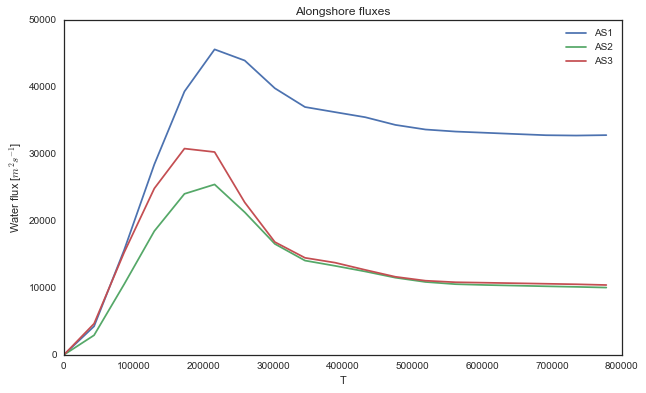

In [91]:
waterAS1b_flux = calc_wat_transport_AS(state03.U, AS1b_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2b_flux = calc_wat_transport_AS(state03.U, AS1b_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3b_flux = calc_wat_transport_AS(state03.U, AS1b_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1b_flux.name = 'WaterFlux_AS1'
waterAS1b_flux.attrs['units'] = 'm2/s'
waterAS2b_flux.name = 'WaterFlux_AS2'
waterAS2b_flux.attrs['units'] = 'm2/s'
waterAS3b_flux.name = 'WaterFlux_AS3'
waterAS3b_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterAS1b_flux.sum(dim='Z').plot(ax=ax, label = 'AS1')
waterAS2b_flux.sum(dim='Z').plot(ax=ax, label = 'AS2')
waterAS3b_flux.sum(dim='Z').plot(ax=ax, label = 'AS3')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')

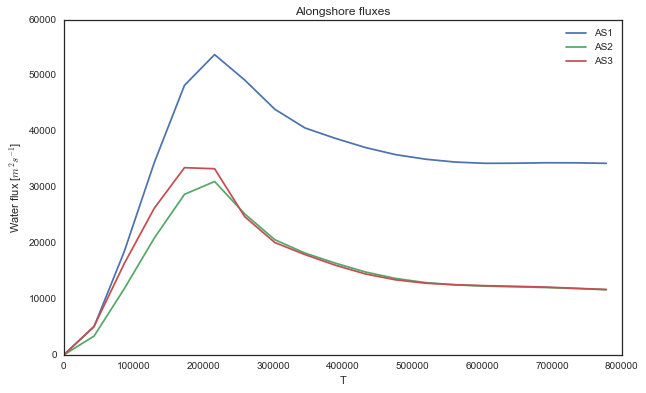

In [92]:
waterAS1c_flux = calc_wat_transport_AS(state03.U, AS1c_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2c_flux = calc_wat_transport_AS(state03.U, AS1c_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3c_flux = calc_wat_transport_AS(state03.U, AS1c_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1c_flux.name = 'WaterFlux_AS1'
waterAS1c_flux.attrs['units'] = 'm2/s'
waterAS2c_flux.name = 'WaterFlux_AS2'
waterAS2c_flux.attrs['units'] = 'm2/s'
waterAS3c_flux.name = 'WaterFlux_AS3'
waterAS3c_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterAS1c_flux.sum(dim='Z').plot(ax=ax, label = 'AS1')
waterAS2c_flux.sum(dim='Z').plot(ax=ax, label = 'AS2')
waterAS3c_flux.sum(dim='Z').plot(ax=ax, label = 'AS3')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')

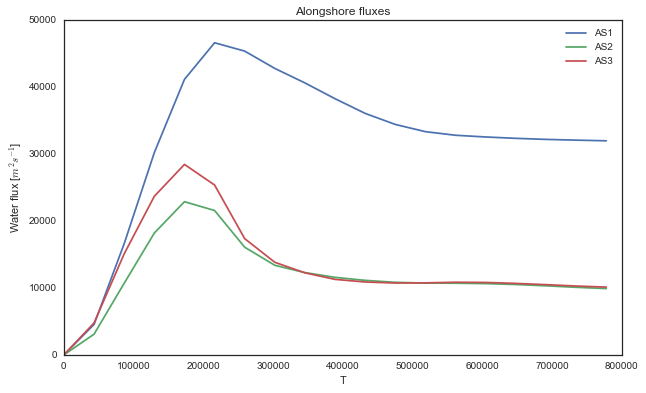

In [93]:
waterAS1d_flux = calc_wat_transport_AS(state03.U, AS1d_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2d_flux = calc_wat_transport_AS(state03.U, AS1d_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3d_flux = calc_wat_transport_AS(state03.U, AS1d_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1d_flux.name = 'WaterFlux_AS1'
waterAS1d_flux.attrs['units'] = 'm2/s'
waterAS2d_flux.name = 'WaterFlux_AS2'
waterAS2d_flux.attrs['units'] = 'm2/s'
waterAS3d_flux.name = 'WaterFlux_AS3'
waterAS3d_flux.attrs['units'] = 'm2/s'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterAS1d_flux.sum(dim='Z').plot(ax=ax, label = 'AS1')
waterAS2d_flux.sum(dim='Z').plot(ax=ax, label = 'AS2')
waterAS3d_flux.sum(dim='Z').plot(ax=ax, label = 'AS3')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')